# Curso de Big Data

## Trabajo Práctico 1 - Parte 2

### Grupo: Armas Braithwaite, Fernández, Menta, Vargas Ochuza

### Reglas de formato y presentación
- El trabajo debe estar bien comentado (utilizando #) para que el código sea fácil de entender por sus compañeros y profesores.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Miércoles 4 de octubre a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub con el mensaje “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 1 deben estar dentro de esa carpeta.
- También deben completar el link de su repositorio -para que pueda ser clonado y corregido- en la siguiente google sheet: https://docs.google.com/spreadsheets/d/11nJY1Frgla45sTgsPiSeOZM9iBM-XRWh/edit?usp=sharing&ouid=105815768529474116534&rtpof=true&sd=true
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No completen la google sheet hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se  corregirán sus tareas hasta no ver el link en la google sheet.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [1]:
# Importamos los módulos necesarios para trabajar
import requests
import matplotlib.pyplot as plt

In [2]:
# Nuestro producto de interés será Protector Solar
buscar = "Protector Solar"

# Seguimos el formato que requiere la API donde adicionalmente indicamos que es MercadoLibre Argentina
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20"))

# Hacemos el 'request' y obtenemos la 'response'
response = requests.request("GET", url)
print(response) 

# Vemos el texto
response.text

<Response [200]>


'{"site_id":"MLA","country_default_time_zone":"GMT-03:00","query":"Protector Solar","paging":{"total":2902,"primary_results":1000,"offset":0,"limit":50},"results":[{"id":"MLA901447311","title":"Protector Solar Dermaglós Fps 50 Fps 50 En Emulsión De 250 Ml","condition":"new","thumbnail_id":"641809-MLA44740405275_012021","catalog_product_id":"MLA16048315","listing_type_id":"gold_special","permalink":"https://www.mercadolibre.com.ar/protector-solar-dermaglos-fps-50-fps-50-en-emulsion-de-250-ml/p/MLA16048315","buying_mode":"buy_it_now","site_id":"MLA","category_id":"MLA392400","domain_id":"MLA-SUNSCREENS","thumbnail":"http://http2.mlstatic.com/D_641809-MLA44740405275_012021-I.jpg","currency_id":"ARS","order_backend":1,"price":8019,"original_price":10027,"sale_price":null,"sold_quantity":500,"available_quantity":500,"official_store_id":1859,"official_store_name":"Farmacias Selma","use_thumbnail_id":true,"accepts_mercadopago":true,"tags":["loyalty_discount_eligible","brand_verified","superma

In [3]:
# Guardamos el resultado en un diccionario, utilizamos Json debido a que es muy amigable para hacer estas tareas
# y le brinda una estructura util
data = response.json()

# obtenemos un diccionario denominado 'data'
data

{'site_id': 'MLA',
 'country_default_time_zone': 'GMT-03:00',
 'query': 'Protector Solar',
 'paging': {'total': 2902, 'primary_results': 1000, 'offset': 0, 'limit': 50},
 'results': [{'id': 'MLA901447311',
   'title': 'Protector Solar Dermaglós Fps 50 Fps 50 En Emulsión De 250 Ml',
   'condition': 'new',
   'thumbnail_id': '641809-MLA44740405275_012021',
   'catalog_product_id': 'MLA16048315',
   'listing_type_id': 'gold_special',
   'permalink': 'https://www.mercadolibre.com.ar/protector-solar-dermaglos-fps-50-fps-50-en-emulsion-de-250-ml/p/MLA16048315',
   'buying_mode': 'buy_it_now',
   'site_id': 'MLA',
   'category_id': 'MLA392400',
   'domain_id': 'MLA-SUNSCREENS',
   'thumbnail': 'http://http2.mlstatic.com/D_641809-MLA44740405275_012021-I.jpg',
   'currency_id': 'ARS',
   'order_backend': 1,
   'price': 8019,
   'original_price': 10027,
   'sale_price': None,
   'sold_quantity': 500,
   'available_quantity': 500,
   'official_store_id': 1859,
   'official_store_name': 'Farmacias

In [4]:
# Para chequear haber hecho bien la busqueda inspeccionamos dentro del primer elemento
# del diccionario, en la variable 'results' y pedimos que nos brinde el título
data['results'][0]['title']

# Con el resultado vemos que hicimos bien la búsqueda

'Protector Solar Dermaglós Fps 50 Fps 50 En Emulsión De 250 Ml'

#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [ ]:
# Importamos el módulo que requeriremos para hacer el dataframe y el histograma
import pandas as pd 

In [10]:
# Creamos un dataframe que contiene dos columnas, una con el título de los productos y otra con los precios
precios_df = pd.DataFrame(columns=['Title', 'Price'])

# Armamos un loop que permitirá ir llenando el dataframe generado previamente con los productos obtenidos
for result in data['results']:
    precios_df = precios_df.append({'Title': result['title'], 'Price': result['price']}, ignore_index=True)
    
# Observamos los resultados   
print(precios_df)

                                                Title     Price
0   Protector Solar Dermaglós Fps 50 Fps 50 En Emu...      8019
1   Dermaglos Facial Fps50 Efecto Seco Invisible X...      8846
2   Protector Solar Facial Eucerin Sun Fps 50+ Ton...     11542
3   Anthelios Uvmune 400 Fluido Invisible50+ La Ro...     12232
4   Isdin Fotoprotector Spf50+ Fusion Water Toque ...  15549.22
5   Fotoprotector Isdin Fusion Water Color Ligth  ...  16538.96
6   Protector Solar Dermaglós Fps 40 Fps 40 Efecto...      9190
7   Protector Solar Color Efecto Mate Anthelios Fp...     11017
8   Isdin Foto Ultra Active Unify Fusion Fluid Col...     20629
9   Fotoprotector Isdin Spf 50+ Gel Crema Protecto...     20487
10  Protector Solar Bronceador 8fps 250ml Cocoa Be...      4174
11  Dermaglós Solar Fps 40 Protección Alta X120ml ...      5695
12  Protector Solar Dermaglós Niños Fps 50 Fps 50 ...      7467
13  Cicatricure Protector Solar Fps 50 Antiage X 5...      5214
14  Protector Solar La Roche-posay Anthe

C:\Users\mateo\AppData\Local\Temp\ipykernel_4608\498957439.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  precios_df = precios_df.append({'Title': data['results'][elemento]['title'], 'Price': data['results'][elemento]['price']}, ignore_index=True)
C:\Users\mateo\AppData\Local\Temp\ipykernel_4608\498957439.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  precios_df = precios_df.append({'Title': data['results'][elemento]['title'], 'Price': data['results'][elemento]['price']}, ignore_index=True)
C:\Users\mateo\AppData\Local\Temp\ipykernel_4608\498957439.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  precios_df = precios_df.append({'Title': data['results'][elemento]['title'], 'Price': data['results'][elemento]['pri

In [11]:
# Calculamos el precio máximo, mínimo y promedio
precio_maximo = precios_df['Price'].max()
precio_minimo = precios_df['Price'].min()
precio_promedio = precios_df['Price'].mean()

# Observamos los resultados
print(f"Precio máximo: {precio_maximo}")
print(f"Precio mínimo: {precio_minimo}")
print(f"Precio promedio: {precio_promedio}")

Precio máximo: 31703
Precio mínimo: 2732
Precio promedio: 11814.721875000001


#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

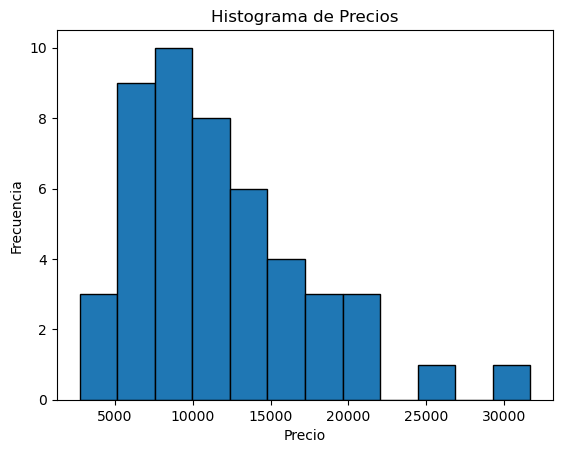

In [16]:
# Armamos un histograma de los precios
plt.hist(precios_df['Price'], bins=12, edgecolor='k') 

# Brindamos referencias para los ejes
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precios')

# Ejecutamos el gráfico para que nos lo muestre
plt.show()

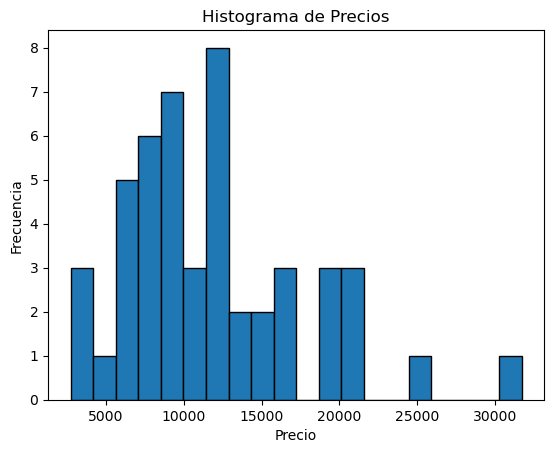

In [17]:
# Creamos el mismo histograma pero con más bins para ver si hay outliers
plt.hist(precios_df['Price'], bins=20, edgecolor='k') 
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precios')
plt.show()

## Nota: parece haber algunos outliers en los precios por encima de 30K, la densidad se acumula entre 2K y 20K